# Cat Boosting Classification


In [2]:
import matplotlib.pyplot as plt  
import pandas as pd  
from catboost import CatBoostClassifier  # boosting algorithm
from joblib import dump  
  
from sklearn.metrics import ConfusionMatrixDisplay  
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import train_test_split  

In [3]:
df = pd.read_csv("../../../../Datasets/SocialNetworkAds.csv")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [6]:
cbc = CatBoostClassifier()
cbc.fit(X_train, y_train)
y_pred = cbc.predict(X_test)

Learning rate set to 0.007741
0:	learn: 0.6803492	total: 63.9ms	remaining: 1m 3s
1:	learn: 0.6675025	total: 66.2ms	remaining: 33.1s
2:	learn: 0.6534064	total: 68.4ms	remaining: 22.7s
3:	learn: 0.6416462	total: 70.3ms	remaining: 17.5s
4:	learn: 0.6284200	total: 72.2ms	remaining: 14.4s
5:	learn: 0.6184626	total: 74.1ms	remaining: 12.3s
6:	learn: 0.6065682	total: 76.1ms	remaining: 10.8s
7:	learn: 0.5950597	total: 78.9ms	remaining: 9.79s
8:	learn: 0.5843209	total: 81.1ms	remaining: 8.93s
9:	learn: 0.5744364	total: 83.5ms	remaining: 8.27s
10:	learn: 0.5658855	total: 85.8ms	remaining: 7.71s
11:	learn: 0.5552092	total: 87.8ms	remaining: 7.23s
12:	learn: 0.5456846	total: 90ms	remaining: 6.84s
13:	learn: 0.5380384	total: 92ms	remaining: 6.48s
14:	learn: 0.5292168	total: 94.3ms	remaining: 6.19s
15:	learn: 0.5206707	total: 96.3ms	remaining: 5.92s
16:	learn: 0.5129927	total: 98.3ms	remaining: 5.68s
17:	learn: 0.5048008	total: 100ms	remaining: 5.47s
18:	learn: 0.4972132	total: 102ms	remaining: 5.27

In [7]:
cbc_con_matrix = confusion_matrix(y_test, y_pred)
abc_acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix", "\n", cbc_con_matrix, "\n")
print("Accuracy of Adaptive Boosting Classification :", abc_acc * 100, "\n")
print("Classification Report", "\n", classification_report(y_test, y_pred))

Confusion Matrix 
 [[22  0]
 [ 1 34]] 

Accuracy of Adaptive Boosting Classification : 98.24561403508771 

Classification Report 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.97      0.99        35

    accuracy                           0.98        57
   macro avg       0.98      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57



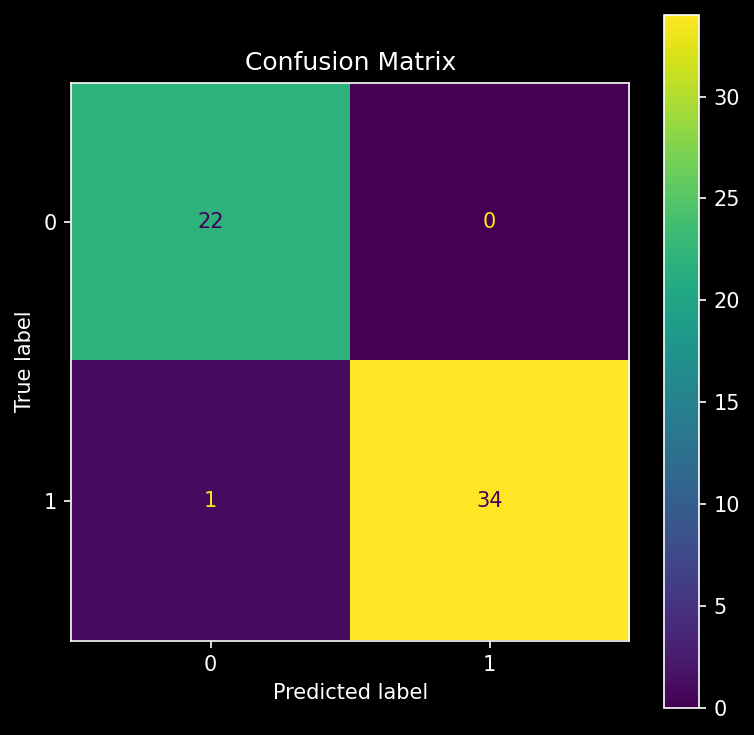

In [8]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
ConfusionMatrixDisplay(cbc_con_matrix).plot(ax=ax)
plt.title("Confusion Matrix")
plt.savefig(
    "Images/Confusion_Matrix_Cat_Boosting_Classification.png", bbox_inches="tight"
)

In [9]:
y_score = cbc.predict_proba(X_test)[:, 1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
roc_auc = auc(false_positive_rate, true_positive_rate)

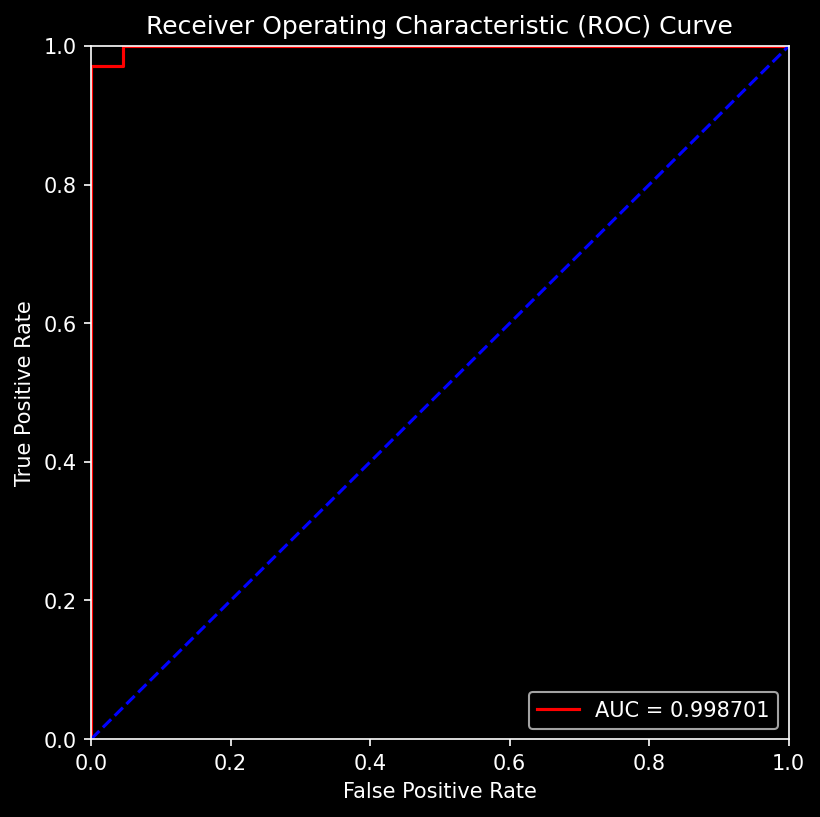

In [11]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
plt.plot(false_positive_rate, true_positive_rate, "r", label="AUC = %f" % roc_auc)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "b--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.savefig("Images/ROC_Curve_Cat_Boosting_Classification.png", bbox_inches="tight")

In [12]:
print(
    "Area Under the Receiver Operating Characteristic Curve :",
    roc_auc_score(y_test, y_score),
)

Area Under the Receiver Operating Characteristic Curve : 0.9987012987012988


In [13]:
dump(cbc, "../../../../Models/catBoostingClassifier.joblib")

['catBoostingClassifier.joblib']